In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import  ConfusionMatrixDisplay, confusion_matrix

In [3]:
import zipfile

with zipfile.ZipFile("/content/fashion-mnist_test.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("Test")


In [4]:
with zipfile.ZipFile("/content/fashion-mnist_train.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("Train")


In [5]:
train = pd.read_csv('/content/Train/fashion-mnist_train.csv')
test = pd.read_csv('/content/Test/fashion-mnist_test.csv')

In [7]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [11]:
train#store first column as target vector
train_labels = np.array(train.label)
test_labels = np.array(test.label)

train.drop('label',axis=1, inplace=True)
test.drop('label',axis=1, inplace=True)

#Reshape - adding one more dimension to each image
train_data = np.array(train).reshape(train.shape[0],28,28,1)
test_data = np.array(test).reshape(test.shape[0],28,28,1)

#Print shapes
print('Train tensor shape: ',train_data.shape)
print('Test tensor shape: ',test_data.shape)
print('Single image shape:', train_data[0].shape)
print('Train_labels shape:', train_labels.shape)
print('Test_labels shape:', test_labels.shape)

Train tensor shape:  (60000, 28, 28, 1)
Test tensor shape:  (10000, 28, 28, 1)
Single image shape: (28, 28, 1)
Train_labels shape: (60000,)
Test_labels shape: (10000,)


In [12]:
#Create label names
label_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

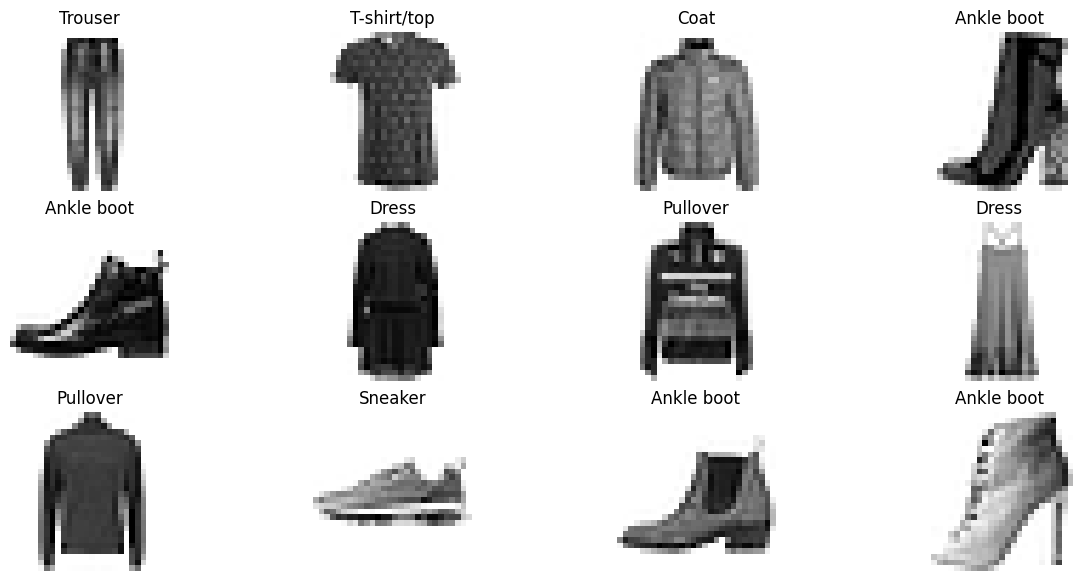

In [13]:
import random
plt.figure(figsize=(15,7))
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    rand_index=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(label_names[train_labels[rand_index]])


In [14]:
# Normalize
train_norm = train_data / 255.0
test_norm = test_data / 255.0

In [15]:
split_index = int(0.8 * len(train_norm))  # 80% train, 20% validation

X_train = train_norm[:split_index]
y_train = train_labels[:split_index]

X_valid = train_norm[split_index:]
y_valid = train_labels[split_index:]


In [16]:
#Set random seed
tf.random.set_seed(42)

#Create model
model = tf.keras.Sequential([

    tf.keras.layers.Conv2D(filters=5, kernel_size=3, strides=1, padding="same", activation="relu",
                           input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(10,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(15,3, padding="valid", activation='relu'),
    tf.keras.layers.Conv2D(20,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(25,3, padding="valid", activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax") #Output layer

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#Compile the model
model.compile(loss="sparse_categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

#Show summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 5)           │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 10)          │             460 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 11, 11, 15)          │           1,365 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 9, 9, 20)            │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 20)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 25)            │           4,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,380 (36.64 KB)

 Trainable params: 9,380 (36.64 KB)

 Non-trainable params: 0 (0.00 B)

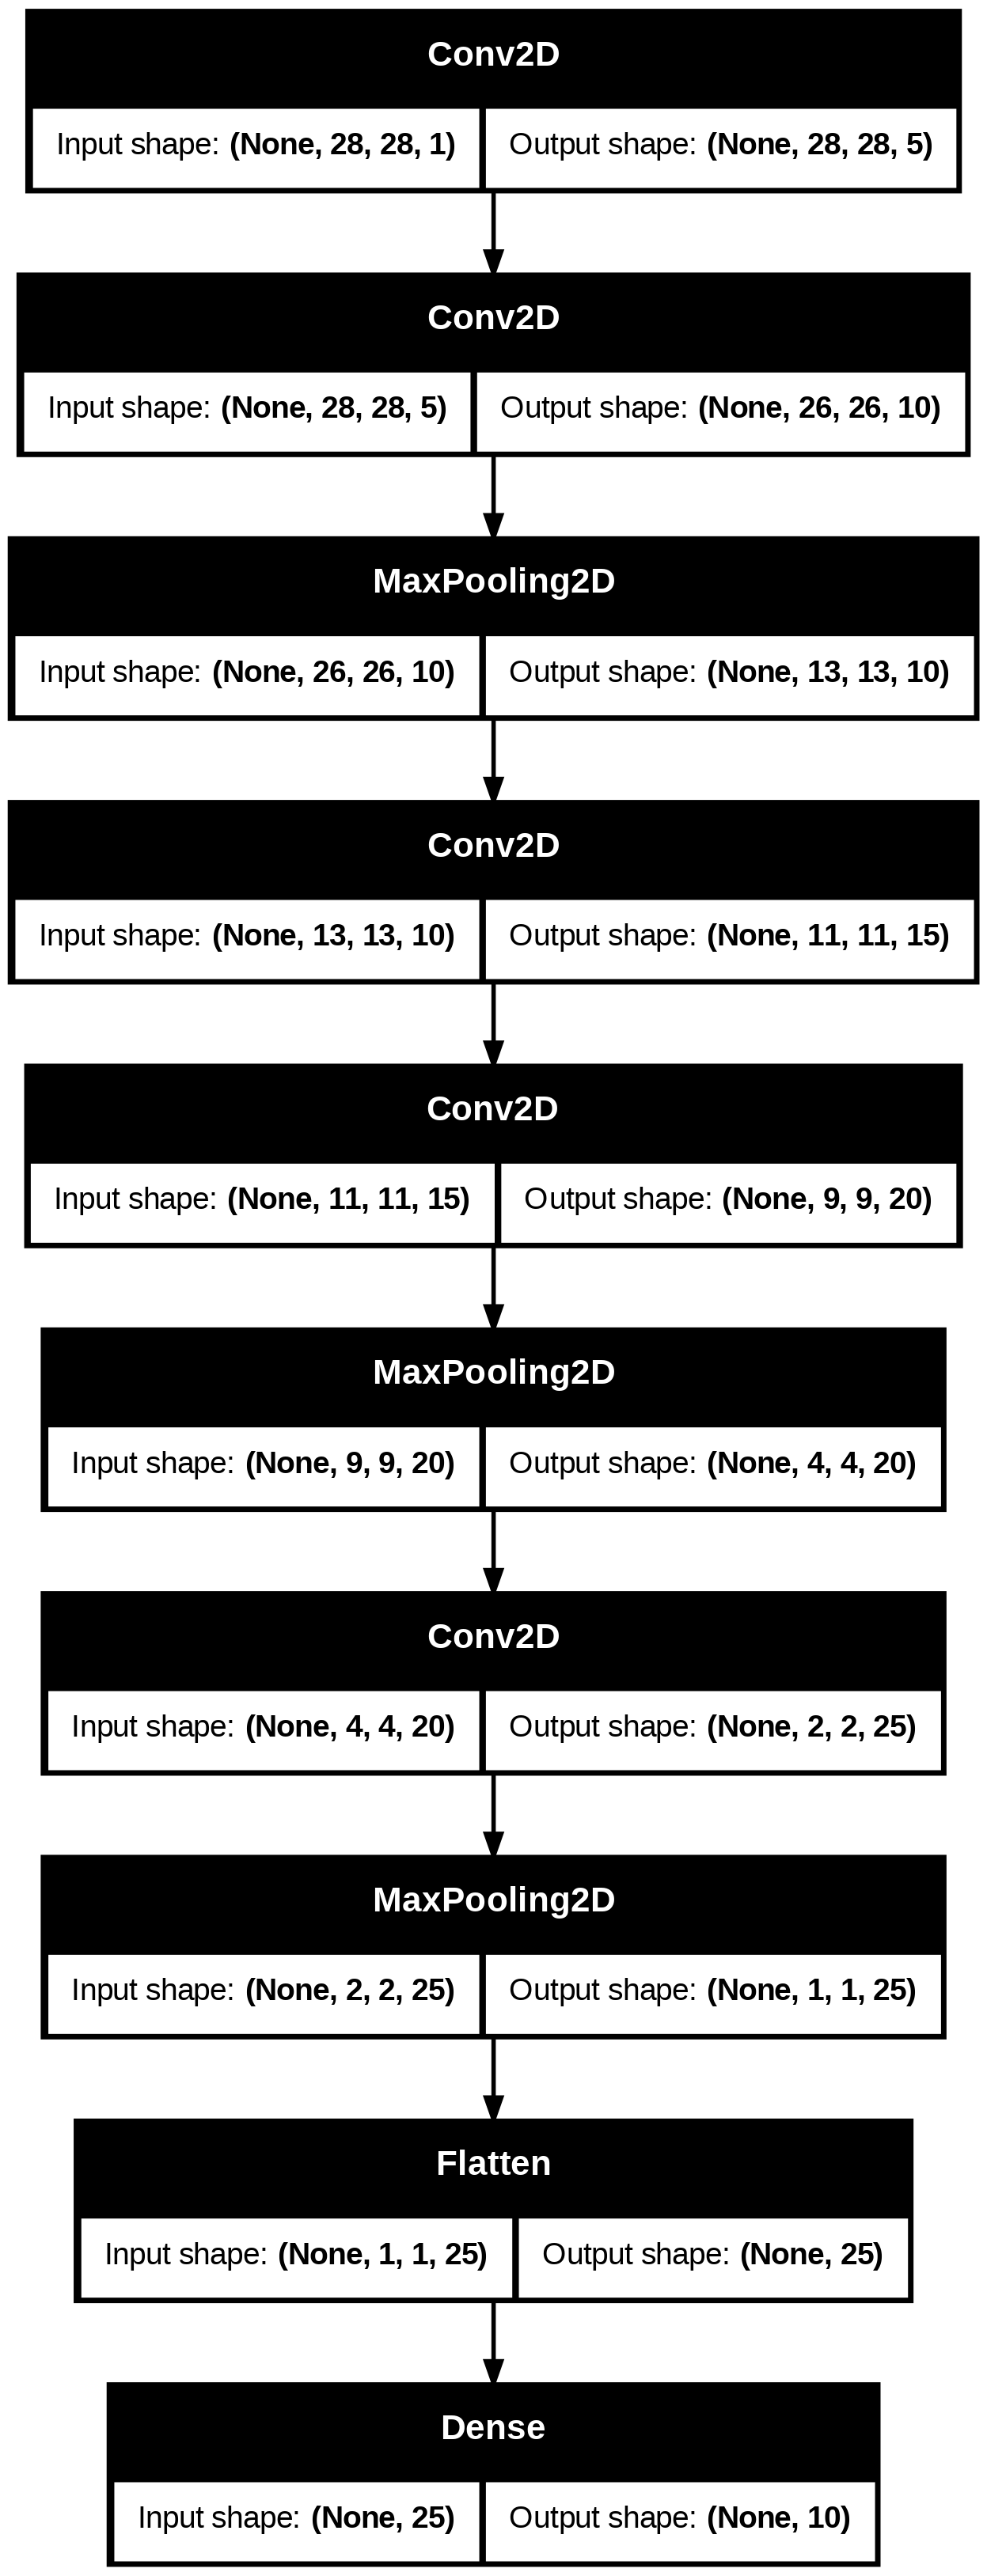

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [21]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (48000, 28, 28, 1)
y_train shape: (48000,)


In [20]:
#Fit the model
history = model.fit(X_train, y_train,
                    epochs=20,batch_size=32,
                    validation_data=(X_valid,y_valid), verbose=1
                    )

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9150 - loss: 0.2377 - val_accuracy: 0.8925 - val_loss: 0.3105
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9165 - loss: 0.2325 - val_accuracy: 0.8932 - val_loss: 0.3114
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9177 - loss: 0.2289 - val_accuracy: 0.8945 - val_loss: 0.3124
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9198 - loss: 0.2239 - val_accuracy: 0.8949 - val_loss: 0.3137
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9214 - loss: 0.2198 - val_accuracy: 0.8943 - val_loss: 0.3168
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9220 - loss: 0.2157 - val_accuracy: 0.8933 - val_loss: 0.3219
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9237 - loss: 0.2118 - val_accuracy: 0.8925 - val_loss: 0.3259
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9243 - loss: 0.2095

In [22]:
loss, accuracy = model.evaluate(test_norm, test_labels)
print('Test accuracy:' , accuracy * 100,'%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8870 - loss: 0.3832
Test accuracy: 89.28999900817871 %


In [23]:
#Make predictions
y_probs = model.predict(test_norm)

#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


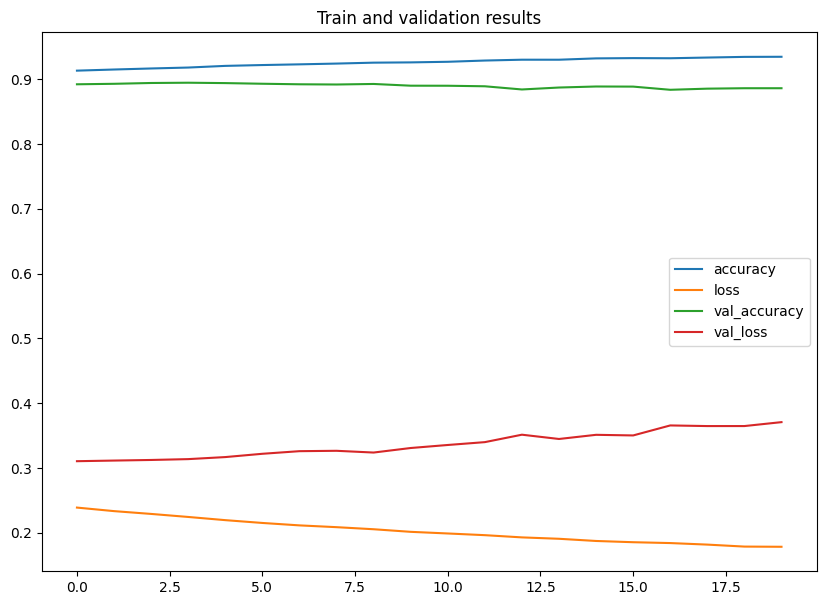

In [26]:
pd.DataFrame(history.history).plot(title="Train and validation results",figsize=(10,7));

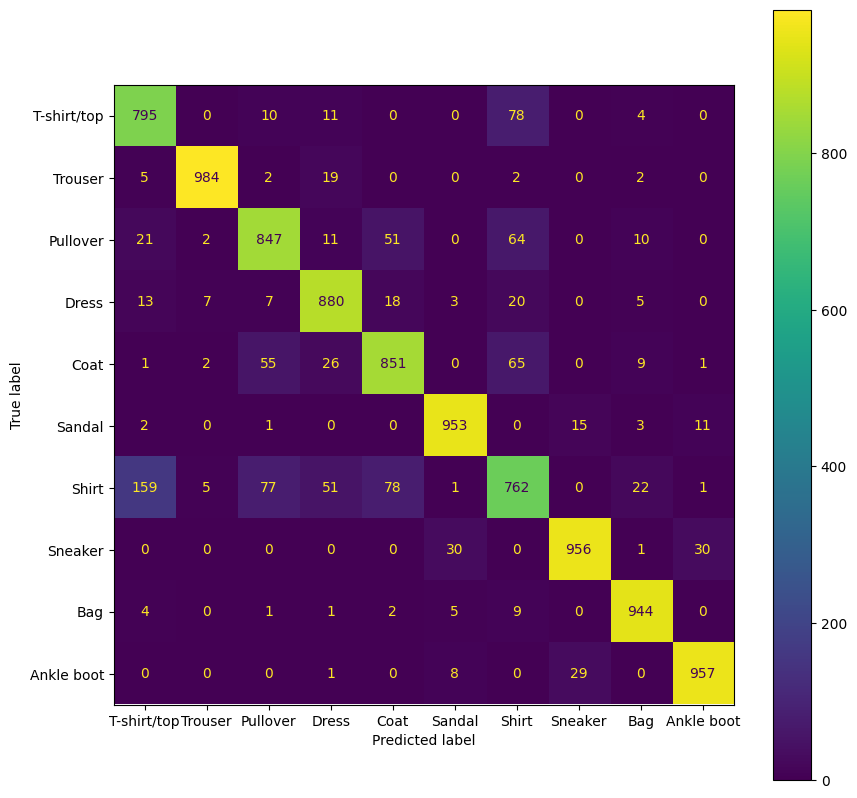

In [27]:
#Confusion matrix
cm=confusion_matrix(y_preds,test_labels)
#Plot
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


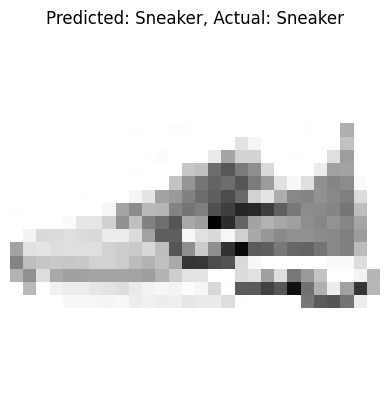

In [29]:
import random

# Select a random image from the test set
index = random.randint(0, len(test_norm) - 1)
image = test_norm[index]

# Make a prediction
prediction = model.predict(image.reshape(1, 28, 28, 1))
predicted_class = prediction.argmax()

# Display the image and prediction
plt.imshow(image.reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted: {label_names[predicted_class]}, Actual: {label_names[test_labels[index]]}")
plt.axis(False)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


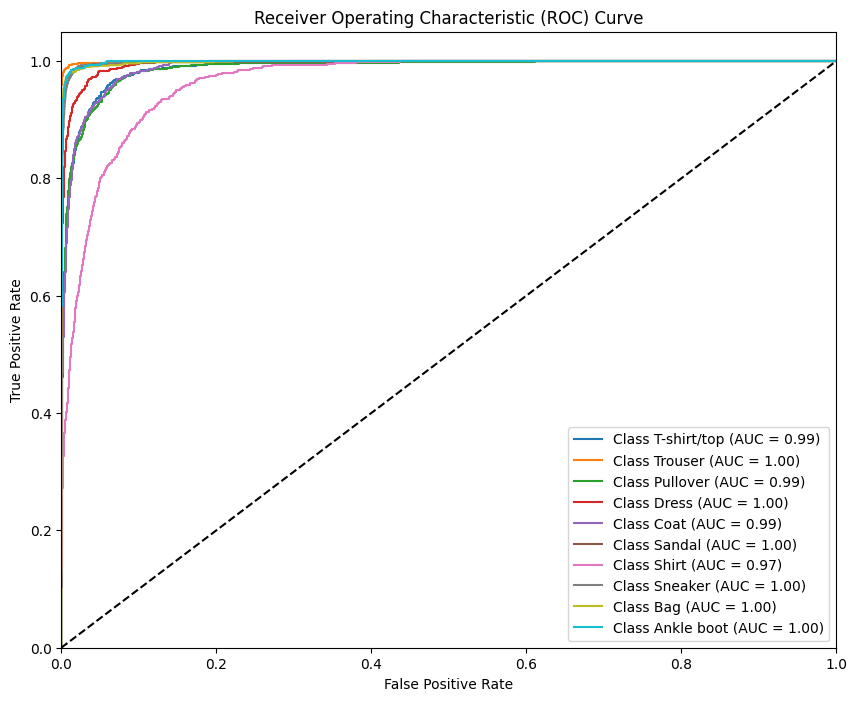

In [30]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for each class
y_probs = model.predict(test_norm)

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):  # Assuming 10 classes
    fpr[i], tpr[i], _ = roc_curve(test_labels == i, y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'Class {label_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()